In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/CE9010_cleaned_data.csv")

In [3]:
columns_to_drop = ["link", "description", "weight", "hdd_gb", "ssd_gb", "graphic_card"]

In [4]:
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               302 non-null    object 
 1   price               302 non-null    float64
 2   brand               302 non-null    object 
 3   resolution          302 non-null    object 
 4   screen_size         302 non-null    float64
 5   level_1_model       302 non-null    object 
 6   processor           302 non-null    object 
 7   processor_speed     302 non-null    float64
 8   ram                 302 non-null    float64
 9   warranty            302 non-null    int64  
 10  hdd_exist           302 non-null    int64  
 11  ssd_exist           302 non-null    int64  
 12  graphic_card_exist  302 non-null    int64  
 13  storage             302 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 33.2+ KB


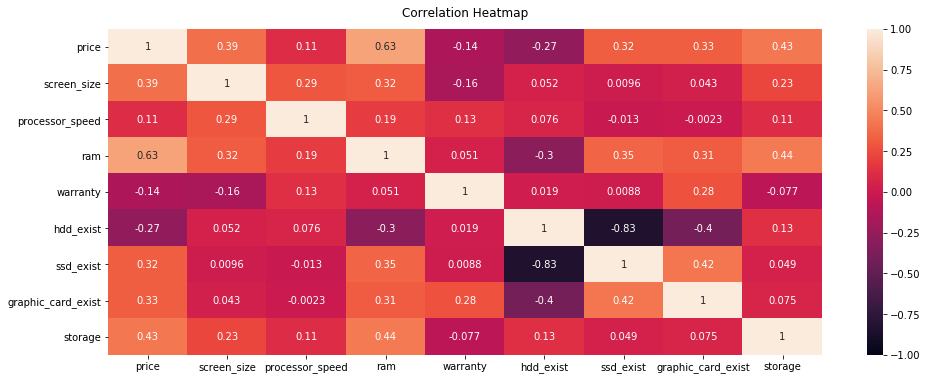

In [6]:
plt.figure(figsize=(16, 6))

# Show correlation between each data values using Pearson Correlation Coefficient (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Cropped top and bottom part of seaborn heatmap, bug in matplotlib 3.1 (https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap

In [7]:
# Save heatmap
figure = heatmap.get_figure()    
figure.savefig('corr_heatmap.png', dpi=400)